In [1]:

%pprint
import sys
sys.path.insert(1, '../py')

Pretty printing has been turned OFF


In [2]:

from os import path as osp
from pandas import DataFrame
from notebook_utils import NotebookUtilities
import matplotlib.pyplot as plt
import random
%matplotlib inline

nu = NotebookUtilities(data_folder_path=osp.abspath('../data'))


# START Triage vs SALT Triage

## Salt and START Triage Differences

* SALT allows for a quick global sorting of the patients so responders can more accurately identify patients who aren’t responding or have an obvious life threat. START relies more on assessing the first person who isn’t Minor (ie triage starts at my feet, not necessarily where the sick patient are).
* Someone who is bleeding can bleed to death in as little as 3-5 minutes. SALT allows for early hemorrhage control. In START Triage, bleeding control doesn’t occur until AFTER respirations are counted and perfusion (cap refill) is checked. This makes SALT faster than START overall AND in hemorrhage control. 
* In SALT, the individual assessment begins with limited rapid lifesaving interventions: 
    * Control major hemorrhage with tourniquets or direct pressure provided by other patients or other devices 
    * Open the airway through positioning or basic airway adjuncts (no advanced airway devices should be used) 
    * If the patient is a child, consider giving 2 rescue breaths 
    * Chest needle decompression 
    * CBRN Antidotes or Autoinjector antidotes 
* START assumes that “All Walking Wounded” are Minor. We know that devastating wounds like upper extremity trauma or penetrating abdominal trauma patients may still be able to ambulate so this is a false assumption. 
* START triage requires responders to count respirations and count and check capillary refill. Literature shows that Assessment must not require counting or timing vital signs and instead use yes–or-no criteria. This makes things easier and faster for responders in high stress environments. 
* SALT includes an Expectant Category for patients who are still breathing but unlikely to survive given curnt resources. 
nt resources. 
resources. 


In [3]:

# Get all CSVs out of one data frame
if nu.pickle_exists('clean_csvs_df'):
    clean_csvs_df = nu.load_object('clean_csvs_df')
    print(clean_csvs_df.shape)
    df = clean_csvs_df.sample(4).dropna(axis='columns', how='all')
    display(df.T)

(149166, 101)


,44841,117971,5797,116971
action_type,S_A_L_T_WAVED,TOOL_HOVER,TOOL_HOVER,TELEPORT
elapsed_time,36615,277626,3639992,446007
event_time,2023-03-03 11:36:00,2023-05-31 10:38:00,2023-05-16 15:59:00,2023-05-09 09:49:00
session_uuid,5dce5abe-7ded-46e7-8d07-b2e2cd76ef55,d605640c-fde5-412f-8d33-b9b2744172ab,06574b6f-ab02-432c-9a65-7b031218a270,d347b967-5e20-4527-95dd-3a0fdf73af1d
file_name,Marty5,d605640c-fde5-412f-8d33-b9b2744172ab,06574b6f-ab02-432c-9a65-7b031218a270,d347b967-5e20-4527-95dd-3a0fdf73af1d
scene_index,1,1,12,2
teleport_location,NaN,NaN,NaN,"(1.5, 0.0, 7.9)"
s_a_l_t_waved_sort_location,"(2.9, 0.0, 0.1)",NaN,NaN,NaN
s_a_l_t_waved_sort_command_text,waved,NaN,NaN,NaN
s_a_l_t_waved_patient_id,Mike_1 Root,NaN,NaN,NaN


In [5]:

from pandas import DataFrame

rows_list = []
for (session_uuid, scene_index), scene_df in fu.get_session_groupby(mask_series=None, extra_column='scene_index'):
    for patient_id, patient_df in scene_df.groupby('patient_id'):
        mask_series = ~patient_df.tool_applied_type.isnull() | ~patient_df.tag_applied_type.isnull()
        df = patient_df[mask_series]
        if df.shape[0]:
            # display(df.dropna(axis='columns', how='all').T); raise
            for row_index, row_series in df.iterrows():
                row_dict = {}
                for cn in fu.patient_groupby_columns: row_dict[cn] = eval(cn)
                row_dict['elapsed_time'] = row_series.elapsed_time
                action_type = row_series.action_type
                if (action_type == 'TOOL_APPLIED'): row_dict['timeline_notes'] = f'Tool applied: {row_series.tool_applied_type}'
                elif (action_type == 'TAG_APPLIED'): row_dict['timeline_notes'] = f'Tag applied: {row_series.tag_applied_type}'
                rows_list.append(row_dict)
triage_timeline_df = DataFrame(rows_list)

In [6]:

triage_timeline_df

,session_uuid,scene_index,patient_id,elapsed_time,timeline_notes
0,04882754-51a0-4e5b-9617-b200e3609116,1,Mike_0 Root,160026,Tool applied: Gauze_Dressing
1,04882754-51a0-4e5b-9617-b200e3609116,1,Mike_0 Root,167410,Tag applied: green
2,04882754-51a0-4e5b-9617-b200e3609116,1,Mike_1 Root,81427,Tool applied: Tourniquet
3,04882754-51a0-4e5b-9617-b200e3609116,1,Mike_1 Root,86304,Tag applied: yellow
4,04882754-51a0-4e5b-9617-b200e3609116,1,Mike_2 Root,122877,Tool applied: Gauze_Pack
...,...,...,...,...,...
3379,ff97fc56-c803-4aa7-b419-35e0ac17d0b3,2,Mike_5 Root,390066,Tool applied: Tourniquet
3380,ff97fc56-c803-4aa7-b419-35e0ac17d0b3,2,Mike_5 Root,399830,Tool applied: Gauze_Pack
3381,ff97fc56-c803-4aa7-b419-35e0ac17d0b3,2,Mike_5 Root,408517,Tag applied: red
3382,ff97fc56-c803-4aa7-b419-35e0ac17d0b3,2,Mike_7 Root,367218,Tool applied: Tourniquet


In [7]:

# Get the scene with the most patients

groupby = triage_timeline_df.groupby(fu.scene_groupby_columns)
session_uuid, scene_index = list(groupby.patient_id.nunique('patient_id').sort_values().tail(1).index.values)[0]

In [8]:

from matplotlib.text import Text
import humanize
from datetime import timedelta

def display_timelines(random_session_uuid=None, random_time_group=None, verbose=False):
    
    # Get a random session
    if random_session_uuid is None:
        random_session_uuid = random.choice(clean_csvs_df.session_uuid.unique())
    
    # Get a random scene from within the session
    if random_time_group is None:
        mask_series = (clean_csvs_df.session_uuid == random_session_uuid)
        random_time_group = random.choice(clean_csvs_df[mask_series].scene_index.unique())
    
    # Get the event time and elapsed time of each person engaged
    base_mask_series = (clean_csvs_df.session_uuid == random_session_uuid) & (clean_csvs_df.scene_index == random_time_group)
    mask_series = base_mask_series & (~clean_csvs_df.tool_applied_type.isnull() | ~clean_csvs_df.tag_applied_type.isnull())
    columns_list = ['patient_id', 'action_type', 'elapsed_time', 'tool_applied_type', 'tag_applied_type']
    patient_engagements_df = clean_csvs_df[mask_series][columns_list].sort_values(['elapsed_time'])
    if verbose: display(patient_engagements_df)
    
    # For each patient, get a timeline of every reference on or before engagement
    color_cycler = nu.get_color_cycler(len(patient_engagements_df.patient_id.unique()))
    hlineys_list = []; hlinexmins_list = []; hlinexmaxs_list = []; hlinecolors_list = []; hlinelabels_list = []
    hlineaction_types_list = []; vlinexs_list = []
    left_lim = 999999; right_lim = -999999
    for (patient_id, df), (y, face_color_dict) in zip(patient_engagements_df.groupby('patient_id'), enumerate(color_cycler())):
        y = 0
    
        # Get the broad horizontal line parameters
        hlineys_list.append(y)
        face_color = face_color_dict['color']
        hlinecolors_list.append(face_color)
        hlinelabels_list.append(patient_id)
        
        if verbose: display(df); raise
    
        # Get the fine horizontal line parameters and plot dimensions
        xmin = df.elapsed_time.min(); hlinexmins_list.append(xmin);
        if xmin < left_lim: left_lim = xmin
        xmax = df.elapsed_time.max(); hlinexmaxs_list.append(xmax);
        if xmax > right_lim: right_lim = xmax
        
        # Get the action type annotation parameters
        for row_index, row_series in df.iterrows():
            x = row_series.elapsed_time
            action_type = row_series.action_type
            if (action_type == 'TOOL_APPLIED'): label = row_series.tool_applied_type.replace('Gauze_', '')
            elif (action_type == 'TAG_APPLIED'): label = row_series.tag_applied_type
            annotation_tuple = (label, x, y)
            hlineaction_types_list.append(annotation_tuple)
    
    ax = plt.figure(figsize=(18, 9/4)).add_subplot(1, 1, 1)
    
    # Add the timelines to the figure subplot axis
    line_collection_obj = ax.hlines(hlineys_list, hlinexmins_list, hlinexmaxs_list, colors=hlinecolors_list)
    
    # Label each timeline with the appropriate patient name
    for label, x, y in zip(hlinelabels_list, hlinexmins_list, hlineys_list):
        plt.annotate(label.replace(' Root', ''), (x, y), textcoords='offset points', xytext=(-4, 25), ha='left')
    
    # Annotate the action types along their timeline
    for annotation_tuple in hlineaction_types_list:
        label, x, y = annotation_tuple
        plt.annotate(label, (x, y), textcoords='offset points', xytext=(0, 0), ha='center', va='center', rotation=90, fontsize=6)
    
    # Remove the ticks and tick labels from the y axis
    ax.set_yticks([])
    ax.set_yticklabels([])
    
    ax.set_xticklabels([
        Text(200000.0, 0, humanize.precisedelta(timedelta(milliseconds=200000.0)).replace(', ', ',\n').replace(' and ', ' and\n')),
        Text(250000.0, 0, humanize.precisedelta(timedelta(milliseconds=250000.0)).replace(', ', ',\n').replace(' and ', ' and\n')),
        Text(300000.0, 0, humanize.precisedelta(timedelta(milliseconds=300000.0)).replace(', ', ',\n').replace(' and ', ' and\n')),
        Text(350000.0, 0, humanize.precisedelta(timedelta(milliseconds=350000.0)).replace(', ', ',\n').replace(' and ', ' and\n')),
        Text(400000.0, 0, humanize.precisedelta(timedelta(milliseconds=400000.0)).replace(', ', ',\n').replace(' and ', ' and\n')),
        Text(450000.0, 0, humanize.precisedelta(timedelta(milliseconds=450000.0)).replace(', ', ',\n').replace(' and ', ' and\n')),
        Text(500000.0, 0, humanize.precisedelta(timedelta(milliseconds=500000.0)).replace(', ', ',\n').replace(' and ', ' and\n')),
        Text(550000.0, 0, humanize.precisedelta(timedelta(milliseconds=550000.0)).replace(', ', ',\n').replace(' and ', ' and\n'))
    ]);
    
    # Move the top and right border out so that the annotations don't cross it
    plt.subplots_adjust(top=1.5)
    xlim_tuple = ax.set_xlim(left_lim-10_000, right_lim+20_000)
    
    # Set the title and labels
    ax.set_title(f'Multi-Patient Timeline for UUID {random_session_uuid} and Scene {random_time_group}')
    ax.set_xlabel('Elapsed Time since Scene Start')

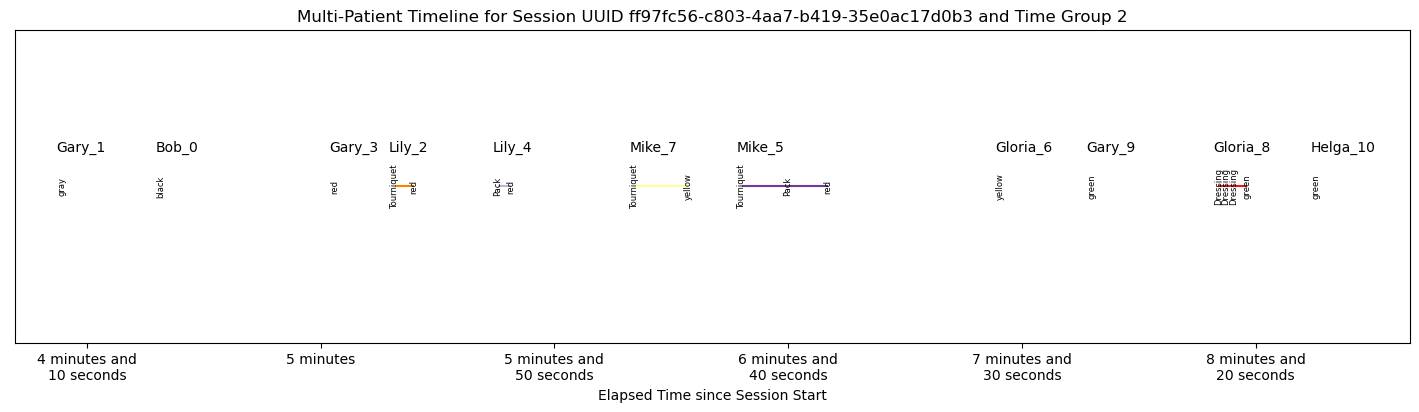

In [9]:

display_timelines(random_session_uuid=session_uuid, random_time_group=scene_index, verbose=False)

In [10]:

clean_csvs_df.patient_demoted_sort.unique()

array([nan, 'waver', 'walker', 'still'], dtype=object)

In [11]:

# Get a list of walkers and their injuries
injury_record_ids_set = set()


for (session_uuid, scene_index, patient_id), patient_df in clean_csvs_df.groupby(fu.patient_groupby_columns):
    mask_series = (patient_df.patient_demoted_sort == 'walker')
    if patient_df[mask_series].shape[0]:
        mask_series = patient_df.injury_record_id.isnull()
        if patient_df[~mask_series].shape[0]:
            injury_record_ids_list = patient_df[~mask_series].injury_record_id.tolist()
            if injury_record_ids_list:
                mask_series = (patient_df.action_type == 'PATIENT_RECORD')
                if patient_df[mask_series].shape[0]: print(session_uuid, scene_index, patient_id, injury_record_ids_list)
                for injury_record_id in injury_record_ids_list:
                    injury_record_ids_set.add(injury_record_id)
print(f'So, maybe the key is to access their treatment of walkers and see if they attend to the extremely traumatized first.', end=' ')
print(f'But the only injury record IDs I have are {nu.conjunctify_nouns(injury_record_ids_set)}.')

06574b6f-ab02-432c-9a65-7b031218a270 3 Mike_2 Root ['L Shoulder Puncture']
0b891add-e0c3-463d-948d-7f491f1d10ef 2 Mike_2 Root ['L Shoulder Puncture']
0b891add-e0c3-463d-948d-7f491f1d10ef 4 Bob_12 Root ['Asthmatic']
0b891add-e0c3-463d-948d-7f491f1d10ef 4 Lily_11 Root ['L Forearm Laceration', 'L Bicep Puncture']
9d142377-69d6-4622-958d-a29a6a0a0d21 1 Mike_2 Root ['L Shoulder Puncture']
a0987257-801e-44c5-a1ad-81e0083bfa46 1 Mike_2 Root ['L Shoulder Puncture']
a0987257-801e-44c5-a1ad-81e0083bfa46 3 Gary_5 Root ['Asthmatic']
So, maybe the key is to access their treatment of walkers and see if they attend to the extremely traumatized first. But the only injury record IDs I have are L Shoulder Puncture, L Forearm Laceration, L Bicep Puncture, and Asthmatic.


In [12]:

clean_csvs_df.injury_record_id.unique()

array([nan, 'R Forearm Laceration', 'L Thigh Laceration',
       'L Shoulder Puncture', 'R Chest Collapse', 'Face Shrapnel',
       'L Wrist Amputation', 'L Chest Collapse', 'L Stomach Puncture',
       'R Shin Amputation', 'L Side Puncture', 'R Side Puncture',
       'R Thigh Laceration', 'R Calf Shrapnel', 'L Thigh Puncture',
       'R Calf Laceration', 'L Forearm Laceration', 'Ear Bleed',
       'Forehead Scrape', 'L Bicep Puncture', 'Asthmatic',
       'R Shoulder Puncture', 'L Shin Amputation', 'L Calf Shrapnel',
       'R Bicep Puncture', 'R Wrist Amputation', 'R Palm Laceration',
       'L Calf Laceration'], dtype=object)

In [13]:

def investigate_object(search_str, columns_list=None, verbose=False):
    '''
    Investigate the presence of search_str and
    make a list of all search_str references
    '''
    if columns_list is None:
        srs = clean_csvs_df.applymap(lambda x: search_str.lower() in str(x).lower(), na_action='ignore').sum()
        mask_series = (srs > 0)
        columns_list = srs[mask_series].index.tolist()
    if verbose: print(columns_list)
    sample_mask_series = False
    references_list = []
    for cn in columns_list:
        mask_series = clean_csvs_df[cn].map(lambda x: search_str in str(x))
        sample_mask_series |= mask_series
        references_list.extend(clean_csvs_df[mask_series][cn].unique().tolist())
    if verbose: print(nu.conjunctify_nouns(set(references_list)))
    df = clean_csvs_df[sample_mask_series].dropna(axis='columns', how='all')
    display(df.sample(min(4, df.shape[0])).T.dropna(axis='index', how='all'))

In [14]:

search_str = 'tourniquet'
investigate_object(search_str, columns_list=None)

,34740,136735,143471,75706
action_type,INJURY_TREATED,TOOL_APPLIED,INJURY_TREATED,INJURY_RECORD
elapsed_time,126774,355799,693983,19381
event_time,2023-03-07 12:55:00,2023-04-21 10:50:00,2023-04-21 11:50:00,2023-06-23 09:57:00
session_uuid,f90a6408-2a18-49b4-8a6b-edee48e7e9ed,313259a4-162f-44f6-8479-92e4554a1464,6909d3b6-a43a-4d26-8c83-9bd8a5ea569f,7de52180-d823-4f9e-9003-aeab8139970b
file_name,Marty18,max14,max3,7de52180-d823-4f9e-9003-aeab8139970b
scene_index,1,2,2,1
injury_record_id,NaN,NaN,NaN,L Thigh Laceration
injury_record_patient_id,NaN,NaN,NaN,Mike_1 Root
injury_record_required_procedure,NaN,NaN,NaN,tourniquet
injury_record_severity,NaN,NaN,NaN,medium


In [15]:

clean_csvs_df.injury_treated_id.unique()

array([nan, 'R Chest Collapse', 'L Thigh Laceration',
       'L Shoulder Puncture', 'R Forearm Laceration', 'L Thigh Puncture',
       'R Calf Laceration', 'R Thigh Laceration', 'R Side Puncture',
       'R Shin Amputation', 'L Side Puncture', 'L Forearm Laceration',
       'R Calf Shrapnel', 'R Shoulder Puncture', 'L Shin Amputation',
       'Face Shrapnel', 'R Wrist Amputation', 'L Stomach Puncture'],
      dtype=object)

In [16]:

# Get a list of walkers that require a tourniquet
injury_record_ids_set = set()


for (session_uuid, scene_index, patient_id), patient_df in clean_csvs_df.groupby(fu.patient_groupby_columns):
    mask_series = (patient_df.patient_demoted_sort == 'walker')
    if patient_df[mask_series].shape[0]:
        mask_series = patient_df.injury_record_id.isnull()
        if patient_df[~mask_series].shape[0]:
            injury_record_ids_list = patient_df[~mask_series].injury_record_id.tolist()
            if injury_record_ids_list:
                mask_series = (patient_df.injury_treated_required_procedure == 'tourniquet')
                if patient_df[mask_series].shape[0]: print(session_uuid, scene_index, patient_id, injury_record_ids_list)
                for injury_record_id in injury_record_ids_list:
                    injury_record_ids_set.add(injury_record_id)

In [17]:

search_str = 'Expectant'
investigate_object(search_str, columns_list=None, verbose=True)

['patient_demoted_salt', 'patient_record_salt', 'voice_capture_message', 'patient_engaged_salt']



""


In [18]:

clean_csvs_df.patient_demoted_salt.unique()

array([nan, 'DELAYED', 'IMMEDIATE', 'EXPECTANT', 'DEAD', 'MINIMAL'],
      dtype=object)

In [19]:

clean_csvs_df.patient_record_salt.unique()

array([nan, 'MINIMAL', 'DELAYED', 'IMMEDIATE', 'DEAD', 'EXPECTANT'],
      dtype=object)

In [20]:

clean_csvs_df.patient_engaged_salt.unique()

array([nan, 'IMMEDIATE', 'DELAYED', 'MINIMAL', 'EXPECTANT', 'DEAD'],
      dtype=object)

In [24]:

# Find out if any of the expectants are not lying still
actions_list = ['demoted', 'record', 'engaged']
mask_series = False
for action in actions_list:
    mask_series |= (clean_csvs_df[f'patient_{action}_salt'] == 'EXPECTANT')
sorts_set = set()
for action in actions_list:
    for sort in clean_csvs_df[mask_series][f'patient_{action}_sort'].unique():
        if str(sort) != 'nan':
            sorts_set.add(sort)
sorts_list = nu.conjunctify_nouns([f'"{sort}"' for sort in sorts_set], and_or='or')
print(f'The expectant patients are all {sorts_list}.')
display(clean_csvs_df[mask_series].sample(7).T.dropna(axis='index', how='all'))

The expectant patients are all "still".


,80595,24817,24705,22645,2631,39451,22999
action_type,PATIENT_ENGAGED,PATIENT_RECORD,PATIENT_DEMOTED,PATIENT_ENGAGED,PATIENT_DEMOTED,PATIENT_RECORD,PATIENT_RECORD
elapsed_time,348664,64321,362321,7312942,1945272,11991,27824
event_time,2023-05-11 10:37:00,2023-05-16 13:59:00,2023-03-08 11:17:00,2023-05-16 18:16:00,2023-05-16 15:31:00,2023-03-08 10:09:00,2023-03-08 13:43:00
session_uuid,8581c1f8-a4e8-4245-ac73-2bd671237001,e78faf41-7bbd-410b-8750-e4e72b951216,db948ce1-783d-4dff-a1f8-2be49570f327,724fdf45-3165-43b8-b9ca-dc07102d2886,06574b6f-ab02-432c-9a65-7b031218a270,b52e71ec-050f-49e1-b495-7c36f5537544,845d87c5-7b8b-4bf3-bfc6-91c74e285243
file_name,8581c1f8-a4e8-4245-ac73-2bd671237001,e78faf41-7bbd-410b-8750-e4e72b951216,db948ce1-783d-4dff-a1f8-2be49570f327,724fdf45-3165-43b8-b9ca-dc07102d2886,06574b6f-ab02-432c-9a65-7b031218a270,Marty23,845d87c5-7b8b-4bf3-bfc6-91c74e285243
scene_index,2,1,1,17,6,1,1
patient_demoted_health_level,NaN,NaN,100,NaN,100,NaN,NaN
patient_demoted_health_time_remaining,NaN,NaN,Infinity,NaN,Infinity,NaN,NaN
patient_demoted_id,NaN,NaN,Bob_0 Root,NaN,Bob_0 Root,NaN,NaN
patient_demoted_position,NaN,NaN,"(-1.4, 0.0, 5.6)",NaN,"(-1.4, 0.0, 5.6)",NaN,NaN


In [149]:

import numpy as np

str(list(sorts_set)[0])

'nan'